# Brute Force

straightforward idea: generate all combinations and keep yhe one holding the clues


- Ideation: 10mn
- Design: 30mn - find how to compute combinations
- Implementation: 1h

In [1]:
%matplotlib inline

In [2]:
from boardutilsv2 import Puzzle, Board, BoardMark
from plotterutilsv2 import BoardPlotter

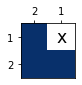

In [3]:
# clues for mini game
clues = {
    'rows': [1, 2],
    'cols': [2, 1]
}
puzzle = Puzzle(clues)
board = Board(puzzle)
plotter = BoardPlotter(board)
board.mark(0, 0, BoardMark.BLACK) 
board.mark(0, 1, BoardMark.FILLER) 
board.mark(1, 0, BoardMark.BLACK) 
board.mark(1, 1, BoardMark.BLACK) 
plotter.show()
assert board.is_done()

Compute all possible boards

In [4]:
# all combinations of 0 and 1 over 4 cells

from itertools import combinations_with_replacement

# combinations of 4 elements amongst 0,1 (range 3)
combinations_iterator = combinations_with_replacement(range(2), 4)
combinations_list = list(combinations_iterator)
print(f"combinations {combinations_list}")


combinations [(0, 0, 0, 0), (0, 0, 0, 1), (0, 0, 1, 1), (0, 1, 1, 1), (1, 1, 1, 1)]


In [5]:
# now check which one is valid

def filter_valid(s):
    board = Board(puzzle)
    board.states.flat[:] = s
    board.prettyprint()
    return board.is_done()
  
[s for s in combinations_list if filter_valid(s)]
    

cols: 2 1
rows:
1
2
[['x' 'x']
 ['x' 'x']]
cols: 2 1
rows:
1
2
[['x' 'x']
 ['x' 'o']]
cols: 2 1
rows:
1
2
[['x' 'x']
 ['o' 'o']]
cols: 2 1
rows:
1
2
[['x' 'o']
 ['o' 'o']]
cols: 2 1
rows:
1
2
[['o' 'o']
 ['o' 'o']]


[]

it is missing some. We need also permutations 

In [6]:
from itertools import permutations, chain
# combination with permutations
# of 4 elements amongst 0,1 (range 3)
# set remove duplicates 
permutations_iterator = [ [p for p in 
                            set(permutations(c))]
                          for c in combinations_list
                        ]
# chain flatten all elements in a single list 
# (instead of a list of permutations for each combination)
options_list = list(chain.from_iterable(permutations_iterator))
print(f"options with permutations {options_list}")


options with permutations [(0, 0, 0, 0), (0, 0, 0, 1), (0, 1, 0, 0), (0, 0, 1, 0), (1, 0, 0, 0), (0, 1, 0, 1), (1, 1, 0, 0), (0, 1, 1, 0), (1, 0, 1, 0), (1, 0, 0, 1), (0, 0, 1, 1), (1, 1, 0, 1), (1, 1, 1, 0), (0, 1, 1, 1), (1, 0, 1, 1), (1, 1, 1, 1)]


We do not need all these as we know the cells must add up to 3

In [7]:
from itertools import permutations, chain

total_blacks = puzzle.required_blacks_count
print(f"total_blacks={total_blacks}")

# combination with permutations
# of 4 elements amongst 0,1 (range 3)
# set remove duplicates 
# keep only combinations where the total number hold the clues
permutations_iterator = [ [p for p in 
                            set(permutations(c))]
                          for c in combinations_list
                             if sum(c) == total_blacks
                        ]
# chain flatten all elements in a single list 
# (instead of a list of permutations for each combination)
options_list = list(chain.from_iterable(permutations_iterator))
print(f"options with permutations {options_list}")


total_blacks=3
options with permutations [(1, 1, 0, 1), (1, 1, 1, 0), (0, 1, 1, 1), (1, 0, 1, 1)]


In [8]:
# now check which one is valid

def filter_valid(s):
    board = Board(puzzle)
    board.states.flat[:] = s
    #board.prettyprint()
    return board.is_done()
  
solution = [s for s in options_list if filter_valid(s)]

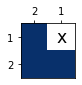

In [9]:
board = Board(puzzle)
plotter = BoardPlotter(board)
board.states.flat[:] = solution
plotter.show()
assert board.is_done()

## class implementation

In [10]:
%reset -f

In [11]:
from boardutilsv2 import Puzzle, Board, BoardMark
from plotterutilsv2 import BoardPlotter

from itertools import permutations, chain
from itertools import combinations_with_replacement

class SolverBruteForce:
    
    def solve(self, some_puzzle, verbose=False):
        # clues total give the number of blacks
        # total for rows or cols is the same
        # TODO class clues and factor out function in Board

        total_blacks = some_puzzle.required_blacks_count 
        if verbose:
            print(f"total_blacks={total_blacks}")
        
        total_cells = some_puzzle.cells_count
        if verbose:
            print(f"number of cells {total_cells}")

        # combination with permutations
        # of 4 elements amongst 0,1 (range 3)
        # set remove duplicates 
        # keep only combinations where the total number hold the clues
        permutations_iterator = [ [p for p in 
                                    set(permutations(c))]
                                  for c in combinations_with_replacement(range(2), total_cells)
                                     if sum(c) == total_blacks
                                ]
        # chain flatten all elements in a single list 
        # (instead of a list of permutations for each combination)
        options_iterator = chain.from_iterable(permutations_iterator)

        def filter_valid(s):
            possible_board = Board(some_puzzle)
            possible_board.states.flat[:] = s
            status = possible_board.is_done() 
            if verbose:
                print(f"option {s} -> {status}")
                print(f"rows blocks {possible_board.get_rows_blocks()}")
                print(f"cols blocks {possible_board.get_cols_blocks()}")

            #if verbose:
            #    possible_board.prettyprint()
            return status

        solutions = [s for s in options_iterator if filter_valid(s)]
        if verbose:
            print(f"solutions {solutions}")
        
        board = Board(some_puzzle)
        board.states.flat[:] = solutions[0]
        
        return board

## tests

### minimal

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 3.81 µs
total_blacks=3
number of cells 4
option (1, 1, 0, 1) -> False
rows blocks [[2], [1]]
cols blocks [[1], [2]]
option (1, 1, 1, 0) -> False
rows blocks [[2], [1]]
cols blocks [[2], [1]]
option (0, 1, 1, 1) -> False
rows blocks [[1], [2]]
cols blocks [[1], [2]]
option (1, 0, 1, 1) -> True
rows blocks [[1], [2]]
cols blocks [[2], [1]]
solutions [(1, 0, 1, 1)]


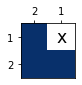

In [12]:
%time
# ox
# oo
clues2x2 = {
    'rows': [1, 2],
    'cols': [2, 1]
}
puzzle2x2 = Puzzle(clues2x2)

board1_solved = SolverBruteForce().solve(puzzle2x2, verbose=True)
plotter1 = BoardPlotter(board1_solved)
plotter1.show()
assert board1_solved.is_done()

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.77 µs


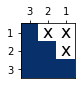

In [13]:
%time
# oxx
# oox
# ooo
clues3x3 = {
    'rows': [1, 2, 3],
    'cols': [3, 2, 1]
}
puzzle3x3 = Puzzle(clues3x3)

board1_solved = SolverBruteForce().solve(puzzle3x3)
plotter1 = BoardPlotter(board1_solved)
plotter1.show()
assert board1_solved.is_done()

In [15]:
%time
# over 3x3 it takes too much memory
if False:
    # oxxx
    # ooxx
    # ooox
    # oooo
    clues4x4 = {
        'rows': [1, 2, 3, 4],
        'cols': [4, 3, 2, 1]
    }
    print("start creating puzzle")
    puzzle4x4 = Puzzle(clues4x4)
    solver1 = SolverBruteForce()
    print("start solving")
    board1_solved = solver1.solve(puzzle4x4, verbose=True)
    print("end solving")
    plotter1 = BoardPlotter(board1_solved)
    plotter1.show()
    assert board1_solved.is_done()

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


### non square

In [16]:
%time
# TODO check why ot gails
if False:
    clues4x2 = {
        'rows': [1, 2, 1, 2],
        'cols': [4, 2]
    }
    puzzle4x2 = Puzzle(clues4x2)

    board1_solved = SolverBruteForce().solve(puzzle4x2, verbose=True)
    plotter1 = BoardPlotter(board1_solved)
    plotter1.show()
    assert board1_solved.is_done()

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs


### 5x5 with split

In [17]:
%time
# over 3x3 it takes too much memory
if False:
    clues5x5split = {
        'rows': [1, 3, [1,1], 3, 5],
        'cols': [1, 4, [2,2], 4, 1]
    }
    puzzle5x5split = Puzzle(clues5x5split)

    board1_solved = SolverBruteForce().solve(puzzle5x5split, verbose=False)
    plotter1 = BoardPlotter(board1_solved)
    plotter1.show()
    assert board1_solved.is_done()

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


# TODO pourquoi marche pas avec non square